## Procesameinto EEG Definitivo

In [1]:
#Librarias
import pandas as pd
import matplotlib.pyplot as plt
import mne
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
import os
import numpy as np
from contextlib import redirect_stdout
from scipy.signal import firwin, lfilter, iirnotch, sosfilt, welch, filtfilt
from tkinter import Tk, filedialog
import pywt
import sys

#Funciones
sys.path.append(r'D:\Proyectos\Procesamiento EEG Definitivo\Scripts')

from Graficar_Senales_EEG import cargar_archivo_eeg, imprimir_metadata_eeg, graficar_eeg_sujeto
from Filtrado_Senales_EEG import wnoisest, thselect, wthresh, apply_wavelet_filter, apply_filters
from Densidad_Espectral_Potencia import compute_average_psd      
from Bandas_Frecuencia import potencia_banda, calcular_potencias_banda, graficar_histograma_combinado, graficar_histograma_promedio, guardar_csv   
from Coherencia_Conectividad import calcular_conectividad_y_graficar, calcular_conectividad_y_graficar_sin_numeros, graficar_kurtosis

---

<div style="text-align: center; font-size: 36px; font-weight: bold; color: #4a86e8;">
Análisis de Señales Electroencefalográficas
</div>

<br>

<div style="text-align: justify; font-size: 18px; line-height: 1.6;">
El <span style="color: #4a86e8; font-weight: bold;">electroencefalograma (EEG)</span> es una técnica no invasiva que registra la actividad eléctrica cerebral. Este método sofisticado se emplea para evaluar diversas funciones neurológicas, incluyendo:

- Patrones de sueño y trastornos relacionados
- Actividad epiléptica y convulsiones
- Detección y seguimiento de tumores cerebrales
- Monitorización de los efectos de fármacos en el sistema nervioso central
- Diagnóstico de diversas afecciones neurológicas y psiquiátricas

</div>

<br>

<div style="text-align: center;">
<img src="assets/eeg.png" alt="Imagen de un electroencefalograma" style="max-width: 100%; height: auto;">
</div>
<br>

---

<div style="text-align: center; font-size: 32px; font-weight: bold; color: #4a86e8;">
Importación de Señales EEG: Guía Práctica
</div>

<br>

<div style="text-align: justify; font-size: 18px; line-height: 1.6;">
Las señales de electroencefalograma (EEG) generadas por nuestro equipo especializado se pueden almacenar en diversos formatos de archivo, incluyendo:

- <span style="color: #4a86e8; font-weight: bold;">.csv</span>: Valores separados por comas, ideal para análisis en hojas de cálculo
- <span style="color: #4a86e8; font-weight: bold;">.txt</span>: Formato de texto plano, fácil de leer y procesar
- <span style="color: #4a86e8; font-weight: bold;">.m</span>: Archivo de MATLAB, óptimo para análisis avanzado de señales
- <span style="color: #4a86e8; font-weight: bold;">.cnt</span>: Formato específico para datos de EEG continuo

Estos archivos contienen información crucial, como:
- Datos demográficos del paciente
- Especificaciones técnicas del equipo utilizado
- Parámetros del test realizado
- Metadatos adicionales relevantes para el análisis

La correcta selección e importación de estos archivos es fundamental para garantizar un análisis preciso y confiable de las señales EEG.
</div>

<br>

<div style="text-align: center;">
<img src="assets/Selecionador_archivos.png" alt="Interfaz de selección de archivos EEG" style="max-width: 100%; height: auto; border: 2px solid #4a86e8; border-radius: 10px;">
</div>

<br>

<div style="text-align: justify; font-size: 16px; font-style: italic; color: #666;">
Nota: Asegúrese de seleccionar el formato de archivo correcto para garantizar una importación exitosa de los datos EEG.
</div>

In [2]:
df_sujeto, info = cargar_archivo_eeg()

Archivo cargado correctamente.


---

<div style="text-align: center; font-size: 32px; font-weight: bold; color: #4a86e8;">
Análisis de Metadata en Señales EEG
</div>

<br>

<div style="text-align: justify; font-size: 18px; line-height: 1.6;">
Tras la carga exitosa del archivo EEG, el paso crítico inicial es examinar su <span style="color: #4a86e8; font-weight: bold;">metadata</span>. Esta información intrínseca del archivo proporciona detalles esenciales para el análisis de los datos. La metadata típicamente incluye:

- <span style="color: #4a86e8;">Número de canales</span>: Define la cantidad de electrodos utilizados.
- <span style="color: #4a86e8;">Frecuencia de muestreo</span>: Indica la resolución temporal de los datos.
- <span style="color: #4a86e8;">Nombres de los canales</span>: Identifica la ubicación específica de cada electrodo.
- <span style="color: #4a86e8;">Duración del registro</span>: Especifica el tiempo total de la grabación EEG.
- <span style="color: #4a86e8;">Ubicación de los electrodos</span>: Detalla la disposición espacial en el cuero cabelludo.

La comprensión precisa de la metadata es fundamental por varias razones:

1. Asegura que los canales disponibles para visualización correspondan exactamente con los definidos en el archivo.
2. Garantiza que la frecuencia de muestreo utilizada en las representaciones gráficas sea precisa.
3. Facilita una interpretación contextualizada de los datos, considerando factores como la duración del registro y la configuración de los electrodos.

<br>

<div style="background-color: #1a237e; border-left: 5px solid #4a86e8; padding: 10px;">
<span style="font-weight: bold;">Nota importante:</span> Una revisión meticulosa de la metadata es esencial para prevenir errores de interpretación y garantizar la validez de los análisis subsecuentes de las señales EEG.
</div>

</div>

In [3]:
imprimir_metadata_eeg(info)

=== Información IMPORTANTE del Archivo EEG === 

Frecuencia de muestreo:            1000.0 Hz
Total de canales:                         60
Número de electrodos:               63
Lista de Canales:                        FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, FC5, FC3, FC1, FCZ, FC2, FC4, FC6, T7, C5, C3, C1, CZ, C2, C4, C6, T8, TP7, CP5, CP3, CP1, CPZ, CP2, CP4, CP6, TP8, P7, P5, P3, P1, PZ, P2, P4, P6, P8, PO7, PO5, PO3, POZ, PO4, PO6, PO8, O1, OZ, O2, HEO, VEO
Bads (canales malos):                 FC5, C5, CP3, P1, VEO


---

<div style="text-align: center; font-size: 32px; font-weight: bold; color: #64b5f6;">
Visualización de Canales en Señales EEG
</div>

<br>

<div style="text-align: justify; font-size: 18px; line-height: 1.6; color: #e0e0e0;">
Tras cargar el archivo EEG, es crucial examinar su <span style="color: #64b5f6; font-weight: bold;">metadata</span>. Esta información proporciona detalles vitales para el análisis, incluyendo:

- <span style="color: #64b5f6;">Número de canales</span>
- <span style="color: #64b5f6;">Frecuencia de muestreo</span>
- <span style="color: #64b5f6;">Nombres de los canales</span>

La comprensión precisa de estos datos es esencial por varias razones:

1. Asegura que los canales visualizados correspondan exactamente con los definidos en el archivo.
2. Garantiza que la frecuencia de muestreo utilizada en las representaciones gráficas sea precisa.
3. Permite una interpretación contextualizada y precisa de las señales EEG.

<div style="background-color: #1a237e; border-left: 5px solid #64b5f6; padding: 10px; margin-top: 15px;">
<span style="font-weight: bold; color: #ffffff;">Nota importante:</span> <span style="color: #e0e0e0;">La correcta interpretación de la metadata es fundamental para garantizar que las gráficas sean representativas y fieles a la información contenida en el archivo original.</span>
</div>

</div>

<br>

<div style="text-align: center;">
<img src="assets/distribucion_electrodos.png" alt="Distribución de electrodos EEG" style="max-width: 100%; height: auto; border: 2px solid #64b5f6; border-radius: 10px;">
</div>

<br>

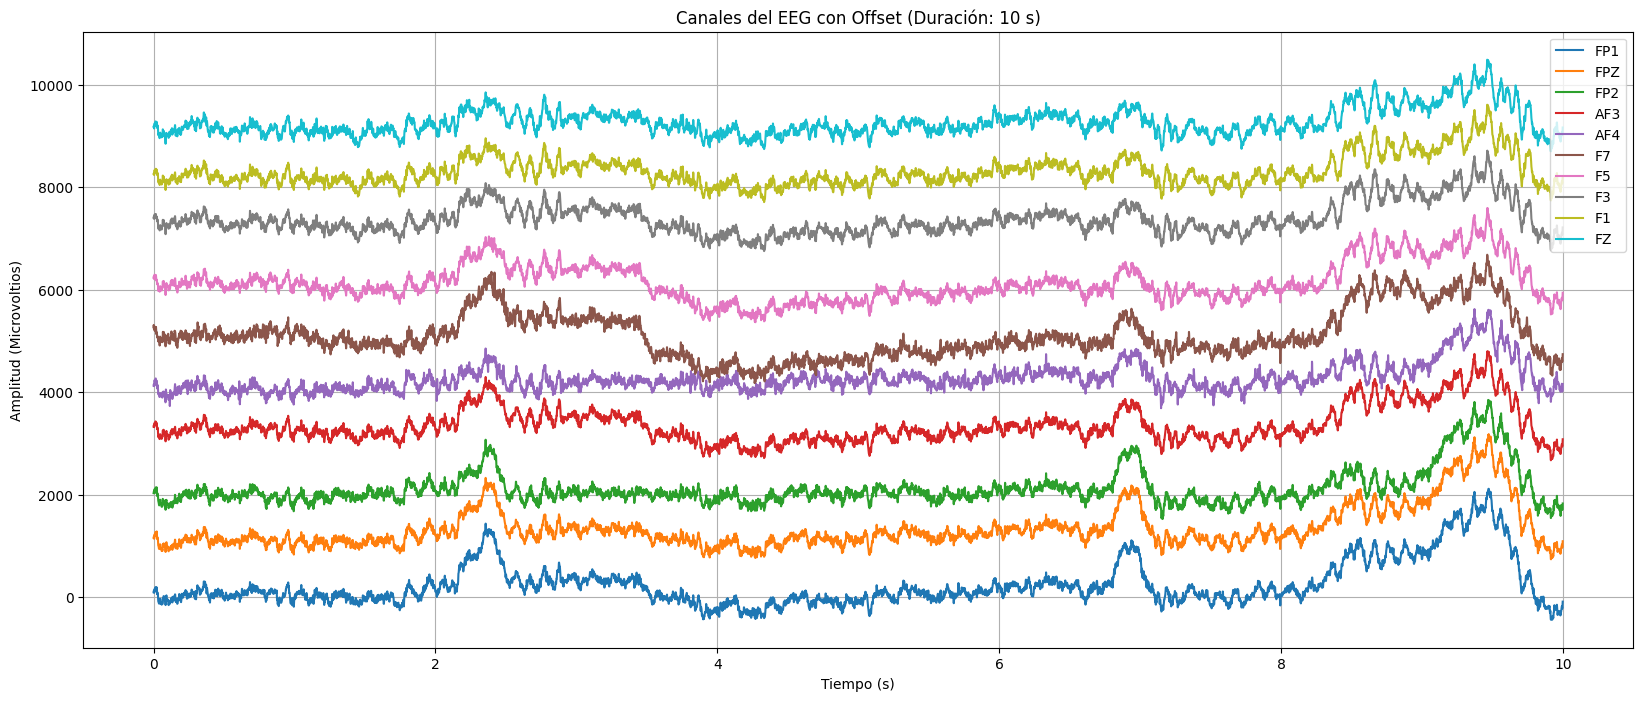

In [4]:
Frecuencia_Muestreo = 1000          #Frecuencia de muestreo
Canales = 10                         #Número de canales
Duracion = 10                        #Segundos que la señal se grafica (Rango entre 0 y 100)
Separacion_Canales = 1000           #Separación entre canales
#Canales_Especificos=['FP1', 'FPZ', 'FP2', 'AF3']

graficar_eeg_sujeto(df_sujeto, Frecuencia_Muestreo, Canales, Duracion, Separacion_Canales)
#graficar_eeg_sujeto(df_sujeto, Frecuencia_Muestreo, Canales, Duracion, Separacion_Canales, Canales_Especificos )


---

<div style="text-align: center; font-size: 32px; font-weight: bold; color: #64b5f6;">
Procesamiento y Filtrado Avanzado de Señales EEG
</div>

<br>

<div style="text-align: justify; font-size: 18px; line-height: 1.6; color: #e0e0e0;">
En el análisis de EEG, el filtrado es un paso crucial para mejorar la calidad de las señales. Los filtros se emplean para:

- Eliminar artefactos y ruido
- Aislar componentes específicos de la señal
- Mejorar la relación señal-ruido

Tipos de filtros comúnmente utilizados:

1. <span style="color: #64b5f6;">Filtro Notch:</span> Elimina el ruido de 50/60 Hz proveniente de fuentes eléctricas.
2. <span style="color: #64b5f6;">Filtro Pasa Bajas:</span> Atenúa frecuencias altas, suavizando la señal.
3. <span style="color: #64b5f6;">Filtro Pasa Altas:</span> Elimina componentes de baja frecuencia, como la deriva de línea base, movimiento respiratorio, entre otros factores de baja frecuencia.
4. <span style="color: #64b5f6;">Filtro Pasa Banda:</span> Combina pasa bajas y pasa altas para aislar rangos de frecuencia específicos.
5. <span style="color: #64b5f6;">Filtros Wavelet:</span> Especialmente útiles para eliminar ruido de gran amplitud causado por el movimiento del paciente durante la prueba.

<div style="background-color: #1a237e; border-left: 5px solid #64b5f6; padding: 10px; margin-top: 15px;">
<span style="font-weight: bold; color: #ffffff;">Nota importante:</span> <span style="color: #e0e0e0;">La aplicación precisa de filtros es esencial para obtener una representación clara y útil de las señales cerebrales, permitiendo un análisis más exacto de la actividad neuronal de interés.</span>
</div>

<div style="background-color: #0d47a1; border-left: 5px solid #64b5f6; padding: 10px; margin-top: 15px;">
<span style="font-weight: bold; color: #ffffff;">Filtros Wavelet para Eliminación de Artefactos:</span>
<span style="color: #e0e0e0;">
Los filtros wavelet son particularmente efectivos para eliminar ruido de gran amplitud causado por el movimiento del paciente. Estos filtros:
- Descomponen la señal en diferentes escalas de tiempo y frecuencia.
- Permiten identificar y eliminar componentes de ruido sin afectar significativamente la señal de interés.
- Son adaptables a diferentes tipos de artefactos y patrones de ruido.
- Preservan mejor las características temporales y espectrales de la señal EEG en comparación con los filtros tradicionales.
</span>
</div>

</div>

<br>

<div style="text-align: center;">
<img src="assets/Filtrado de una señal.png" alt="Proceso de filtrado de una señal EEG" style="max-width: 100%; height: auto; border: 2px solid #64b5f6; border-radius: 10px;">
</div>

<div style="text-align: center; font-size: 14px; color: #b0bec5; margin-top: 10px;">
Figura 1: Comparación de una señal EEG antes y después del proceso de filtrado
</div>

<br>

<div style="text-align: center; font-size: 28px; font-weight: bold; color: #64b5f6;">
Visualización de Canales EEG Filtrados
</div>

<br>

<div style="text-align: justify; font-size: 18px; line-height: 1.6; color: #e0e0e0;">
Tras aplicar los filtros apropiados, incluyendo los filtros wavelet para artefactos de movimiento, es crucial examinar los canales EEG resultantes. Esta visualización permite:

- Verificar la efectividad del proceso de filtrado, especialmente en la eliminación de artefactos de gran amplitud
- Identificar patrones de actividad cerebral más claros, libres de interferencias por movimiento
- Detectar posibles artefactos residuales y evaluar la necesidad de filtrado adicional
- Comparar la calidad de la señal entre diferentes canales y métodos de filtrado

La inspección visual de los canales filtrados es un paso esencial para validar la calidad del procesamiento y preparar los datos para análisis posteriores más avanzados, asegurando que los artefactos de movimiento hayan sido efectivamente mitigados.
</div>

Señal Original


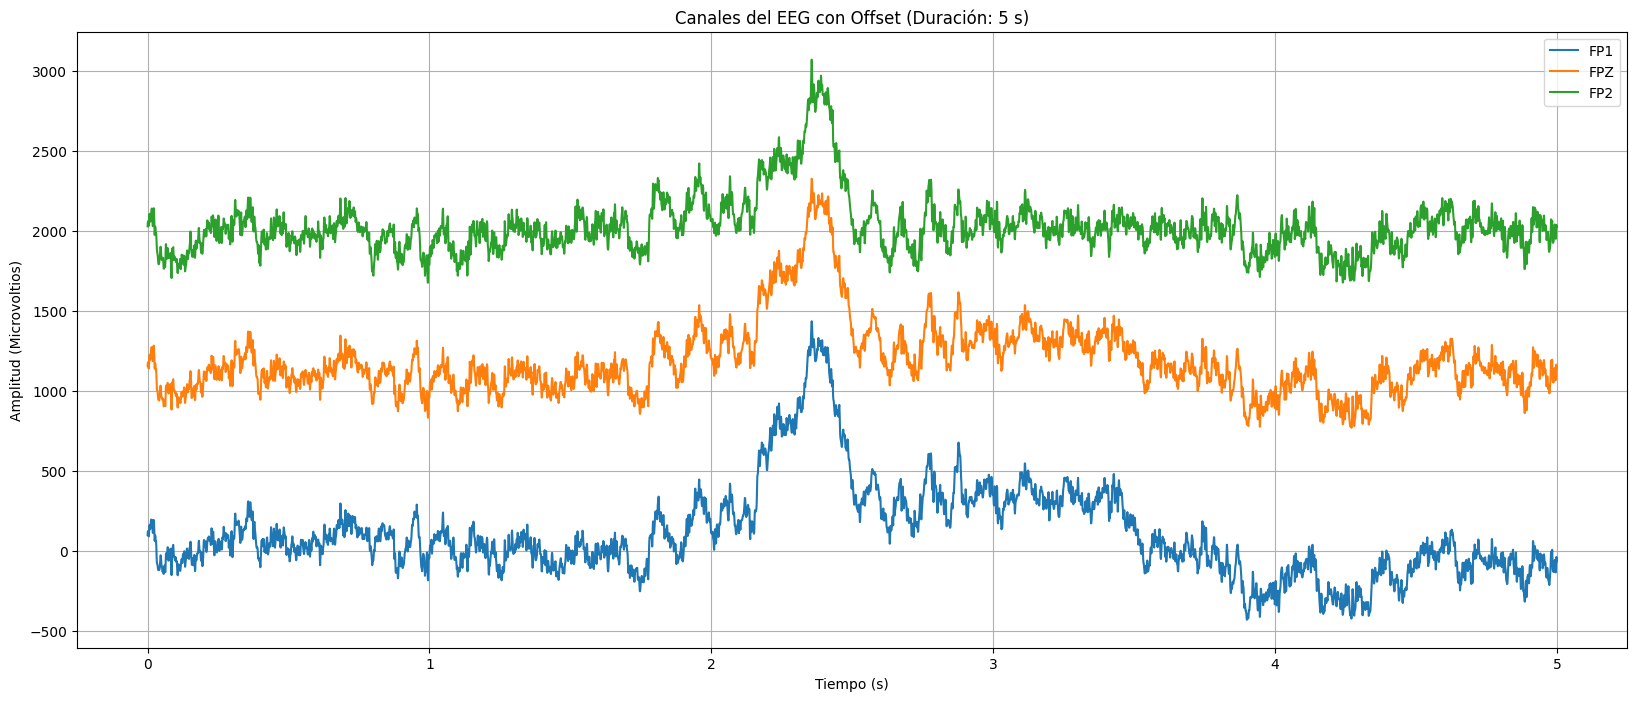

Señal Filtrada


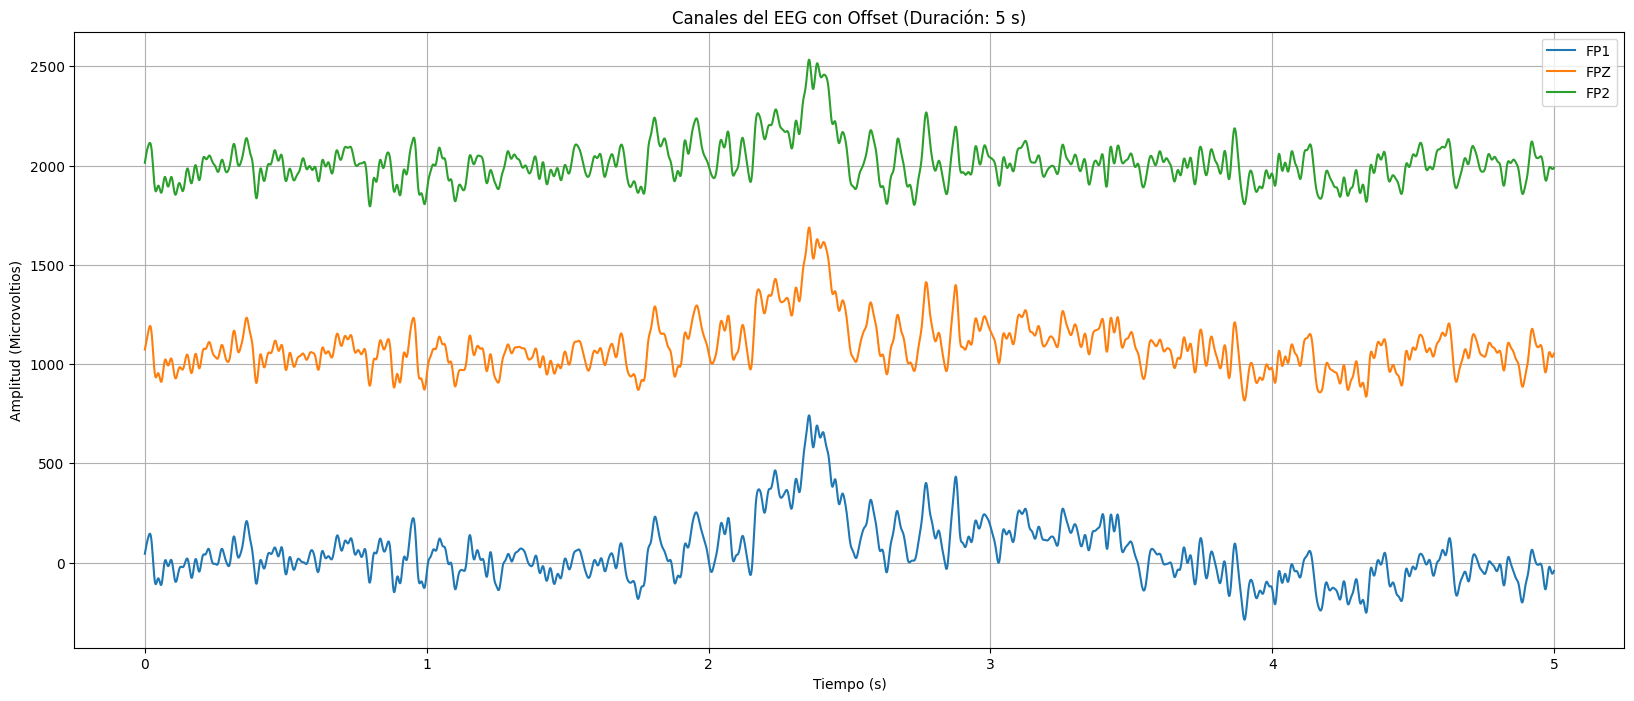

In [5]:
# Parámetros de los filtros
Frecuencia_corte_inferior = 1.5     # Frecuencia de corte inferior en Hz por defecto es 1.5 Hz
Frecuencia_corte_superior = 50      # Frecuencia de corte superior en Hz por defecto es 50 Hz
Filtro_notch = 60                   # Frecuencia a eliminar con el filtro notch, puede ser de 50 o 60 Hz
Orden_filtro = 3                    # Orden del filtro FIR por defecto es 3

# Variables para graficar
Frecuencia_Muestreo = 1000          #Frecuencia de muestreo
Canales = 3                         #Número de canales
Duracion = 5                        #Segundos que la señal se grafica (Rango entre 0 y 100)
Separacion_Canales = 3000           #Separación entre canales
#Canales_Especificos=['FP1', 'FPZ', 'FP2', 'AF3']


# Aplicar los filtros
df_sujeto_filtrado_fir = apply_filters(df_sujeto, Frecuencia_corte_inferior, Frecuencia_corte_superior, Filtro_notch)
df_sujeto_filtrado_completo = apply_wavelet_filter(df_sujeto_filtrado_fir)


print('Señal Original')
graficar_eeg_sujeto(df_sujeto, Frecuencia_Muestreo, Canales, Duracion, offset=1000)  
print('Señal Filtrada')
graficar_eeg_sujeto(df_sujeto_filtrado_fir, Frecuencia_Muestreo, Canales, Duracion, offset=1000)    


---

<div style="text-align: center; font-size: 32px; font-weight: bold; color: #64b5f6;">
Análisis de la Densidad Espectral de Potencia (PSD) en EEG
</div>

<br>

<div style="text-align: justify; font-size: 18px; line-height: 1.6; color: #e0e0e0;">
La <span style="color: #64b5f6;">Densidad Espectral de Potencia (PSD)</span> es una herramienta fundamental en el análisis de señales EEG, que permite:

1. <span style="color: #64b5f6;">Descomposición de señales:</span> Analiza las señales en términos de sus componentes de frecuencia.
2. <span style="color: #64b5f6;">Distribución de potencia:</span> Identifica cómo se distribuye la potencia en diferentes bandas de frecuencia.

Aplicaciones clave de la PSD en EEG:

- <span style="color: #64b5f6;">Detección de patrones:</span> Identifica actividad cerebral asociada con estados cognitivos y emocionales específicos.
- <span style="color: #64b5f6;">Diagnóstico neurológico:</span> Ayuda en la detección y monitoreo de condiciones neurológicas.
- <span style="color: #64b5f6;">Desarrollo de biomarcadores:</span> Facilita la creación de indicadores para estudios clínicos y de investigación.
- <span style="color: #64b5f6;">Detección de anomalías:</span> Permite identificar patrones inusuales en la actividad cerebral.
- <span style="color: #64b5f6;">Diseño de filtros:</span> Contribuye al desarrollo de filtros más efectivos para la limpieza de señales.
- <span style="color: #64b5f6;">Correlación cerebro-comportamiento:</span> Ayuda a entender la relación entre el comportamiento y la actividad cerebral.

<div style="background-color: #1a237e; border-left: 5px solid #64b5f6; padding: 10px; margin-top: 15px;">
<span style="font-weight: bold; color: #ffffff;">Nota importante:</span> <span style="color: #e0e0e0;">La interpretación precisa de la PSD es crucial para extraer información significativa de las señales EEG y puede revelar insights valiosos sobre la función cerebral que no son evidentes en el dominio del tiempo.</span>
</div>

</div>

<br>

<div style="text-align: center;">
<img src="assets/Espectograma de potencia.png" alt="Espectrograma de potencia de señal EEG" style="max-width: 100%; height: auto; border: 2px solid #64b5f6; border-radius: 10px;">
</div>

<div style="text-align: center; font-size: 14px; color: #b0bec5; margin-top: 10px;">
Figura 1: Espectrograma de potencia mostrando la distribución de frecuencias en una señal EEG
</div>

<br>

<div style="text-align: justify; font-size: 18px; line-height: 1.6; color: #e0e0e0;">
El espectrograma de potencia mostrado arriba visualiza cómo la potencia de la señal EEG se distribuye a lo largo del tiempo y a través de diferentes frecuencias. Las áreas más brillantes indican una mayor concentración de potencia, permitiendo identificar rápidamente patrones dominantes y cambios en la actividad cerebral.
</div>

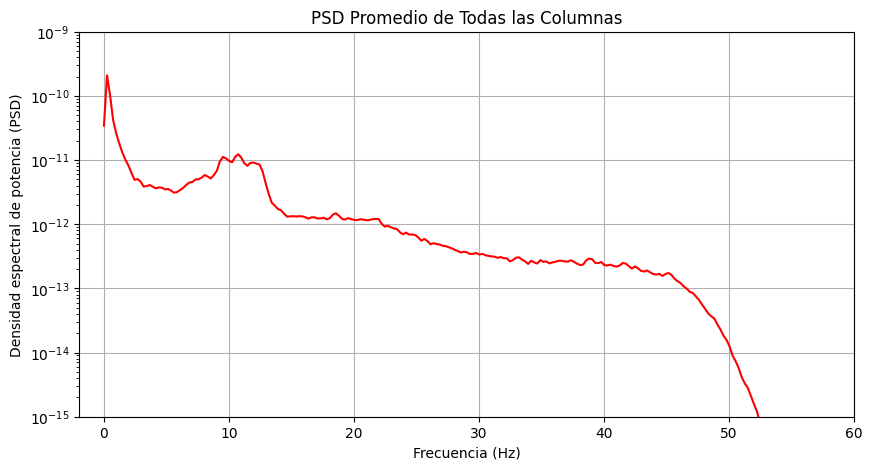

(array([0.00000000e+00, 2.44140625e-01, 4.88281250e-01, ...,
        4.99511719e+02, 4.99755859e+02, 5.00000000e+02]),
 array([3.43132723e-11, 2.09101374e-10, 1.02391808e-10, ...,
        1.07827989e-32, 1.07506398e-32, 5.36995884e-33]))

In [6]:
Frecuencia_Muestreo = 1000              #Frecuencia de muestreo
Resolucion = 4096                       #Resolución de la señal

# Graficar el PSD para df_sujeto_filtrado en la primera subgráfica
compute_average_psd(df_sujeto_filtrado_fir, Frecuencia_Muestreo, Resolucion)



---

<div style="text-align: center; font-size: 32px; font-weight: bold; color: #64b5f6;">
Análisis de la Densidad Espectral de Potencia (PSD) en EEG
</div>

<br>

<div style="text-align: justify; font-size: 18px; line-height: 1.6; color: #e0e0e0;">
La <span style="color: #64b5f6;">Densidad Espectral de Potencia (PSD)</span> es una herramienta fundamental en el análisis de señales EEG, que permite:

1. <span style="color: #64b5f6;">Descomposición de señales:</span> Analiza las señales en términos de sus componentes de frecuencia.
2. <span style="color: #64b5f6;">Distribución de potencia:</span> Identifica cómo se distribuye la potencia en diferentes bandas de frecuencia.

Aplicaciones clave de la PSD en EEG:

- <span style="color: #64b5f6;">Detección de patrones:</span> Identifica actividad cerebral asociada con estados cognitivos y emocionales específicos.
- <span style="color: #64b5f6;">Diagnóstico neurológico:</span> Ayuda en la detección y monitoreo de condiciones neurológicas.
- <span style="color: #64b5f6;">Desarrollo de biomarcadores:</span> Facilita la creación de indicadores para estudios clínicos y de investigación.
- <span style="color: #64b5f6;">Detección de anomalías:</span> Permite identificar patrones inusuales en la actividad cerebral.
- <span style="color: #64b5f6;">Diseño de filtros:</span> Contribuye al desarrollo de filtros más efectivos para la limpieza de señales.
- <span style="color: #64b5f6;">Correlación cerebro-comportamiento:</span> Ayuda a entender la relación entre el comportamiento y la actividad cerebral.

<div style="background-color: #1a237e; border-left: 5px solid #64b5f6; padding: 10px; margin-top: 15px;">
<span style="font-weight: bold; color: #ffffff;">Nota importante:</span> <span style="color: #e0e0e0;">La interpretación precisa de la PSD es crucial para extraer información significativa de las señales EEG y puede revelar insights valiosos sobre la función cerebral que no son evidentes en el dominio del tiempo.</span>
</div>

</div>

<br>

<div style="text-align: center;">
<img src="assets/Espectograma de potencia.png" alt="Espectrograma de potencia de señal EEG" style="max-width: 100%; height: auto; border: 2px solid #64b5f6; border-radius: 10px;">
</div>

<div style="text-align: center; font-size: 14px; color: #b0bec5; margin-top: 10px;">
Figura 1: Espectrograma de potencia mostrando la distribución de frecuencias en una señal EEG
</div>

<br>

<div style="text-align: justify; font-size: 18px; line-height: 1.6; color: #e0e0e0;">
El espectrograma de potencia mostrado arriba visualiza cómo la potencia de la señal EEG se distribuye a lo largo del tiempo y a través de diferentes frecuencias. Las áreas más brillantes indican una mayor concentración de potencia, permitiendo identificar rápidamente patrones dominantes y cambios en la actividad cerebral.
</div>

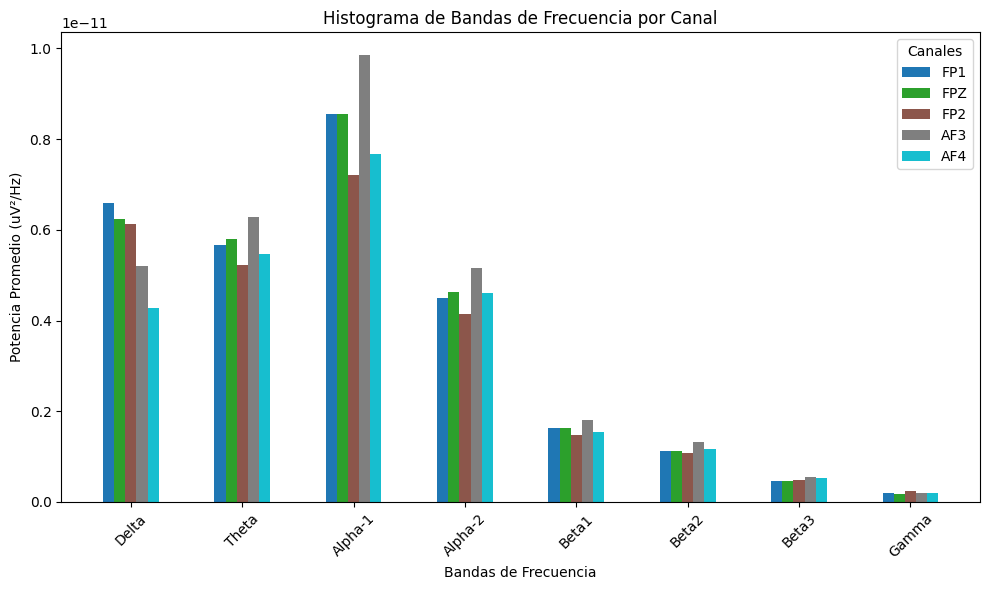

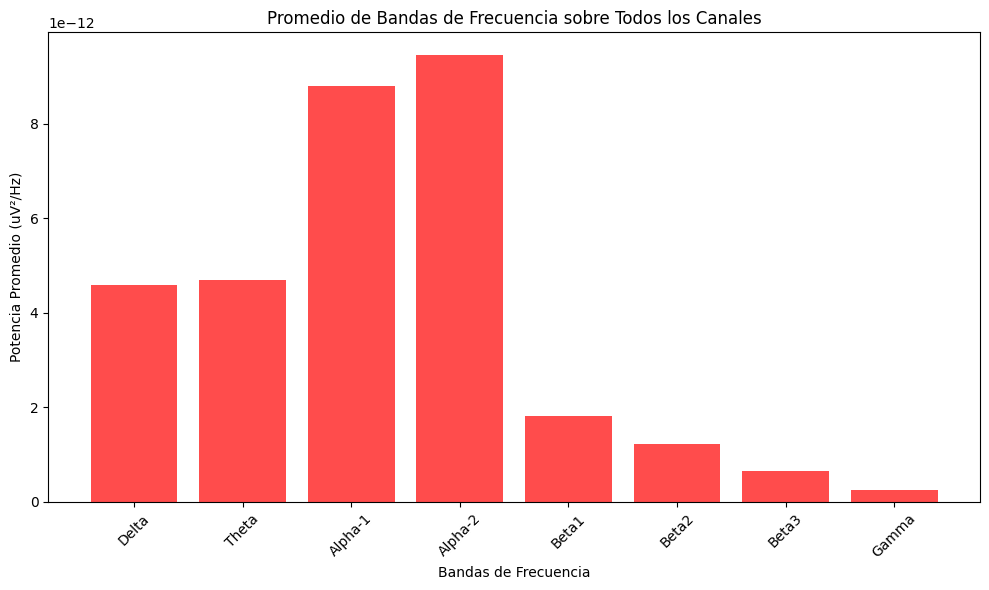

In [7]:
Bandas = {
    'Delta': (1.5, 6),
    'Theta': (6, 8.5),
    'Alpha-1': (8.5, 10.5),
    'Alpha-2': (10.5, 12.5),
    'Beta1': (12.5, 18.5),
    'Beta2': (18.5, 21),
    'Beta3': (21, 30),
    'Gamma': (30, 45)
}

#Canales_Especifos = ['FPZ', 'FP2', 'AF3', 'AF4']
Canales = 5
Resolucion = 4096
Frecuencia_Muestreo = 1000  

bandpower_df = calcular_potencias_banda(df_sujeto_filtrado_fir, Frecuencia_Muestreo, Bandas)
graficar_histograma_combinado(bandpower_df, Canales)
graficar_histograma_promedio(bandpower_df)


---

<div style="text-align: center; font-size: 32px; font-weight: bold; color: #64b5f6;">
Guardando Bandas de Frecuencia en un Archivo CSV
</div>

<br>

<div style="text-align: justify; font-size: 18px; line-height: 1.6; color: #e0e0e0;">
Una vez que las bandas de frecuencia han sido calculadas a partir de los datos de EEG, es importante guardar los resultados para su posterior análisis. Almacenar estas bandas en un archivo <span style="color: #64b5f6; font-weight: bold;">.csv</span> permite un acceso fácil y estructurado a los datos, facilitando su uso en futuros estudios o investigaciones.

A continuación, te mostramos cómo puedes guardar un <span style="color: #64b5f6; font-weight: bold;">DataFrame</span> que contiene las bandas de frecuencia en un archivo `.csv` utilizando Python:

<br>

<div style="text-align: center;">
<img src="assets/7479119.png" alt="Bandas de frecuencia en EEG" style="max-width: 100%; height: auto; border: 2px solid #64b5f6; border-radius: 10px;">
</div>

<br>


In [8]:
guardar_csv(bandpower_df)

No se seleccionó ninguna ubicación.


---

<div style="text-align: center; font-size: 32px; font-weight: bold; color: #64b5f6;">
Conectividad Cerebral en EEG: Mapeo de Redes Neuronales
</div>

<br>

<span style="color: #64b5f6; font-weight: bold;">Tipos principales de conectividad:</span>

1. <span style="color: #64b5f6;">Conectividad Funcional:</span> Mide la dependencia estadística entre señales de diferentes regiones cerebrales.
2. <span style="color: #64b5f6;">Conectividad Efectiva:</span> Evalúa la influencia causal que una región cerebral ejerce sobre otra.
3. <span style="color: #64b5f6;">Conectividad Estructural:</span> Se refiere a las conexiones anatómicas entre regiones cerebrales (aunque no es directamente medible por EEG).

<span style="color: #64b5f6; font-weight: bold;">Métodos de análisis de conectividad:</span>

- <span style="color: #64b5f6;">Coherencia:</span> Mide la correlación entre señales en el dominio de la frecuencia.
- <span style="color: #64b5f6;">Sincronización de fase:</span> Evalúa la consistencia de las diferencias de fase entre señales.
- <span style="color: #64b5f6;">Causalidad de Granger:</span> Determina si una señal puede predecir otra.
- <span style="color: #64b5f6;">Transferencia de entropía:</span> Mide la transferencia de información entre señales.


<div style="text-align: justify; font-size: 18px; line-height: 1.6; color: #e0e0e0;">
La conectividad cerebral en EEG se refiere al estudio de las interacciones entre diferentes regiones del cerebro. Este análisis proporciona información crucial sobre cómo las distintas áreas cerebrales se comunican y coordinan para realizar funciones cognitivas complejas.

</div>

<br>

<div style="text-align: center;">
<img src="assets/mapa_calor.png" alt="Mapa de conectividad cerebral" style="max-width: 100%; height: auto; border: 2px solid #64b5f6; border-radius: 10px;">
</div>

<br>

- Ayuda a comprender la dinámica de redes neuronales en diferentes estados cognitivos.
- Permite identificar alteraciones en la conectividad asociadas con trastornos neurológicos y psiquiátricos.
- Facilita el estudio de la plasticidad cerebral y los cambios en la conectividad durante el aprendizaje.
- Contribuye al desarrollo de biomarcadores para el diagnóstico temprano de enfermedades neurodegenerativas.
- Proporciona insights sobre la organización funcional del cerebro en reposo y durante tareas específicas.


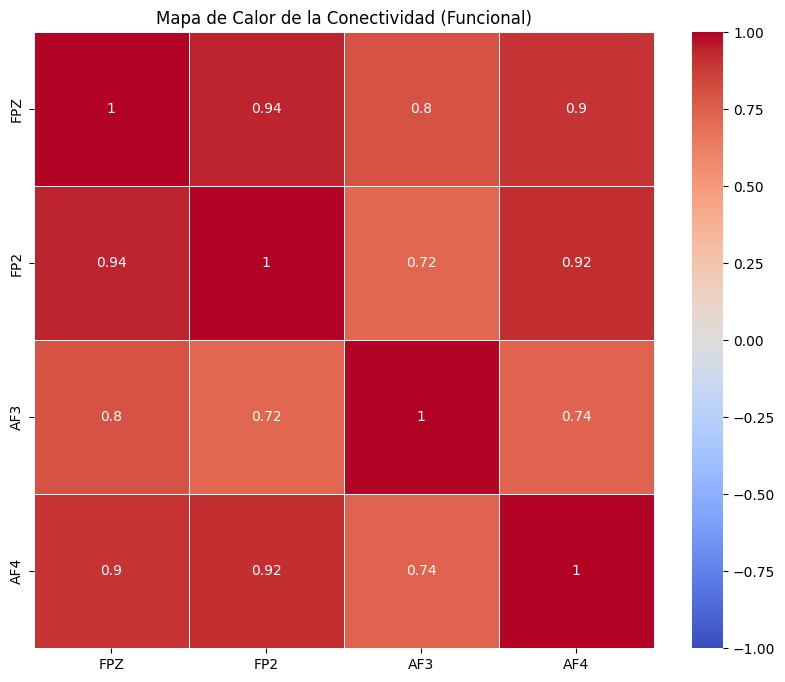

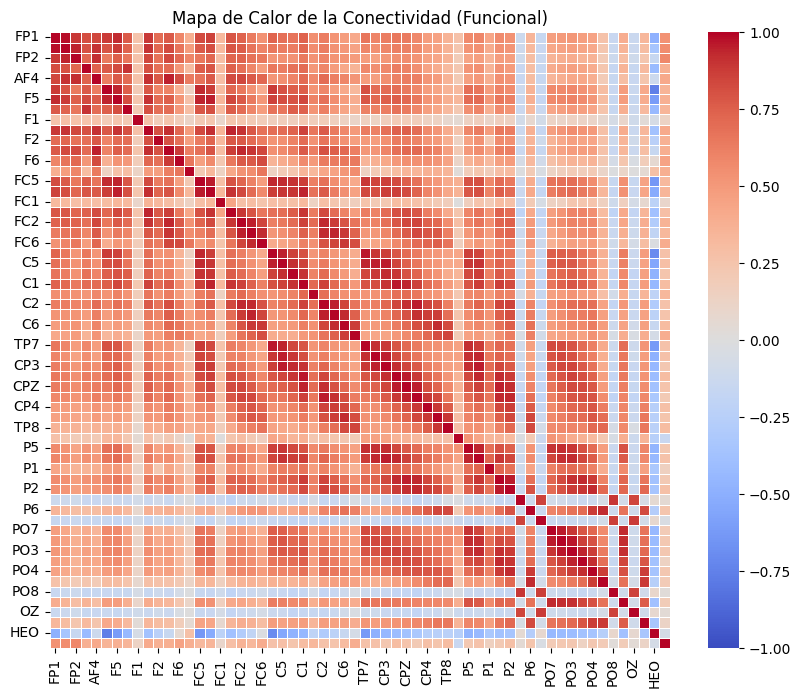

In [9]:
Canales_Especifos = ['FPZ', 'FP2', 'AF3', 'AF4']        #Canales específicos para calcular la conectividad
metodo= 'funcional'                                     #Método para calcular la conectividad (funcional, efectiva, estructural)


calcular_conectividad_y_graficar(df_sujeto_filtrado_fir, metodo, Canales_Especifos)
calcular_conectividad_y_graficar_sin_numeros(df_sujeto_filtrado_fir, metodo)



---

<div style="text-align: center; font-size: 32px; font-weight: bold; color: #64b5f6;">
Kurtosis en EEG: Análisis de la Forma de la Distribución de Señales
</div>

<br>

<div style="text-align: justify; font-size: 18px; line-height: 1.6; color: #e0e0e0;">
La kurtosis es una medida estadística que describe la forma de la distribución de los datos en una señal EEG. En el contexto del EEG, la kurtosis proporciona información valiosa sobre la naturaleza de la actividad cerebral y la presencia de eventos inusuales o artefactos.

<span style="color: #64b5f6; font-weight: bold;">Características clave de la kurtosis en EEG:</span>

1. <span style="color: #64b5f6;">Definición:</span> Mide el grado de "picudez" de la distribución de la señal en comparación con una distribución normal.
2. <span style="color: #64b5f6;">Interpretación:</span>
   - Kurtosis alta: Indica la presencia de valores extremos o eventos inusuales en la señal.
   - Kurtosis baja: Sugiere una distribución más uniforme de la actividad cerebral.
3. <span style="color: #64b5f6;">Valor de referencia:</span> Una distribución normal tiene una kurtosis de 3. Valores superiores indican una distribución más "picuda", mientras que valores inferiores sugieren una distribución más "plana".

<span style="color: #64b5f6; font-weight: bold;">Aplicaciones en el análisis de EEG:</span>

- <span style="color: #64b5f6;">Detección de artefactos:</span> Valores altos de kurtosis pueden indicar la presencia de artefactos como parpadeos o movimientos musculares.
- <span style="color: #64b5f6;">Identificación de actividad epileptiforme:</span> Picos epilépticos tienden a aumentar la kurtosis de la señal.
- <span style="color: #64b5f6;">Evaluación de la calidad de la señal:</span> Puede ayudar a identificar canales o segmentos de EEG con características inusuales.
- <span style="color: #64b5f6;">Caracterización de estados cerebrales:</span> Diferentes estados mentales pueden asociarse con distintos patrones de kurtosis.

</div>

<br>

<div style="text-align: center;">
<img src="assets/kurtosis.png" alt="Visualización de Kurtosis en señales EEG" style="max-width: 100%; height: auto; border: 2px solid #64b5f6; border-radius: 10px;">
</div>

<div style="text-align: center; font-size: 14px; color: #b0bec5; margin-top: 10px;">
Figura 1: Comparación de señales EEG con diferentes valores de kurtosis
</div>

<br>

<div style="text-align: justify; font-size: 18px; line-height: 1.6; color: #e0e0e0;">
La imagen muestra diferentes señales EEG y sus correspondientes valores de kurtosis. Se puede observar cómo las señales con eventos más pronunciados o picos agudos tienden a tener valores de kurtosis más altos, mientras que las señales más uniformes presentan valores de kurtosis más bajos.


- Mejora la detección automatizada de eventos anormales en registros EEG de larga duración.
- Contribuye al desarrollo de algoritmos más robustos para el preprocesamiento y limpieza de señales EEG.
- Ayuda en la caracterización de patrones EEG específicos de ciertas condiciones neurológicas.
- Puede ser utilizada como una característica en sistemas de clasificación automática de estados cerebrales o patologías.

</div>

<span style="color: #64b5f6; font-weight: bold;">Consideraciones importantes:</span>
- La kurtosis es sensible a outliers, por lo que debe interpretarse con precaución en presencia de artefactos.
- El cálculo de la kurtosis puede realizarse en diferentes escalas temporales, desde épocas cortas hasta registros completos.
- La combinación de la kurtosis con otras medidas estadísticas (como la asimetría) puede proporcionar una caracterización más completa de la señal EEG.
- En el análisis de EEG multicanel, la kurtosis puede variar significativamente entre diferentes regiones cerebrales.

El uso de la kurtosis en el análisis de EEG continúa evolucionando, ofreciendo una herramienta valiosa para la caracterización cuantitativa de las señales cerebrales y el desarrollo de métodos avanzados de procesamiento de señales.
</div>

D:\Proyectos\Procesamiento EEG Definitivo\Scripts\Coherencia_Conectividad.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kurtosis_result.index, y=kurtosis_result['Kurtosis'], palette='coolwarm')


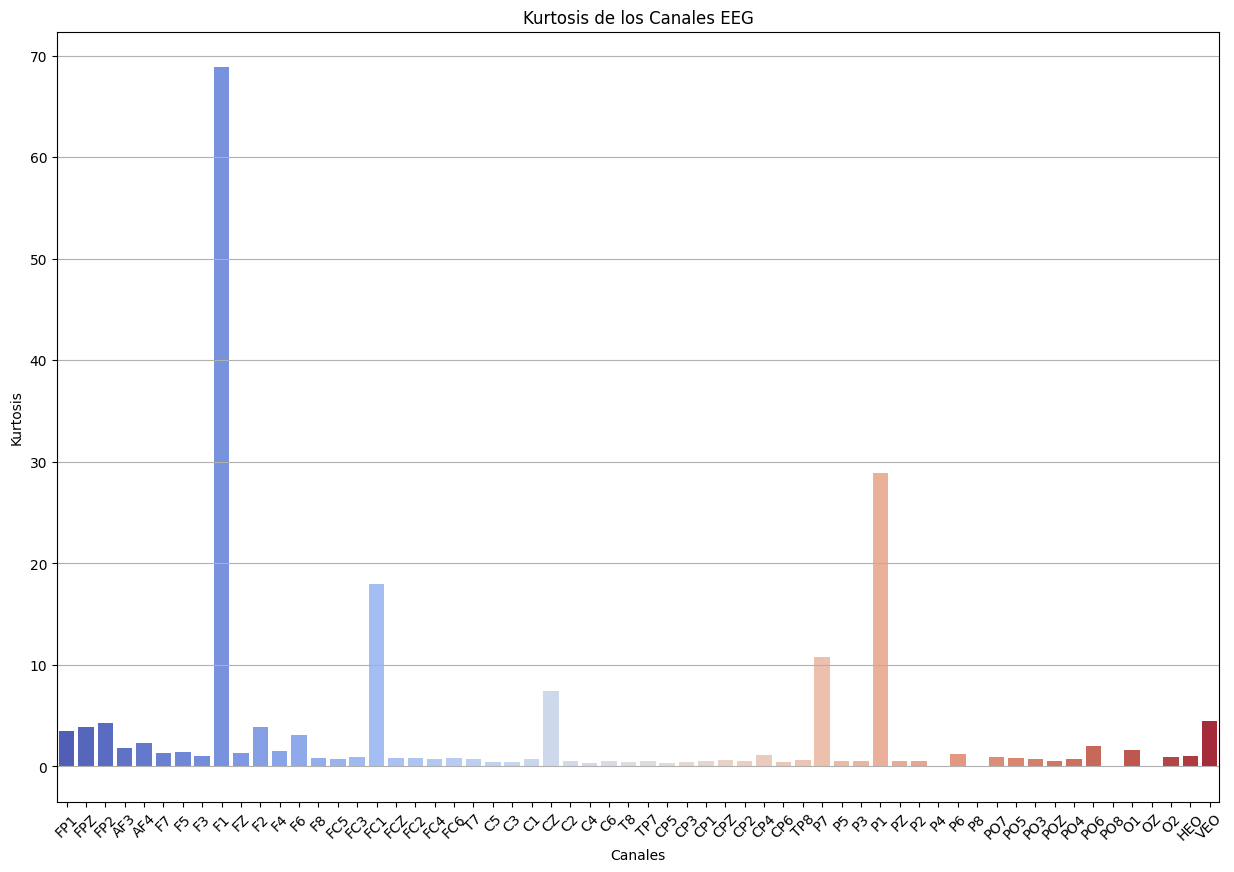

In [10]:
graficar_kurtosis(df_sujeto_filtrado_fir)